<a href="https://colab.research.google.com/github/Observersss/numeral-methods/blob/main/lab_1/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

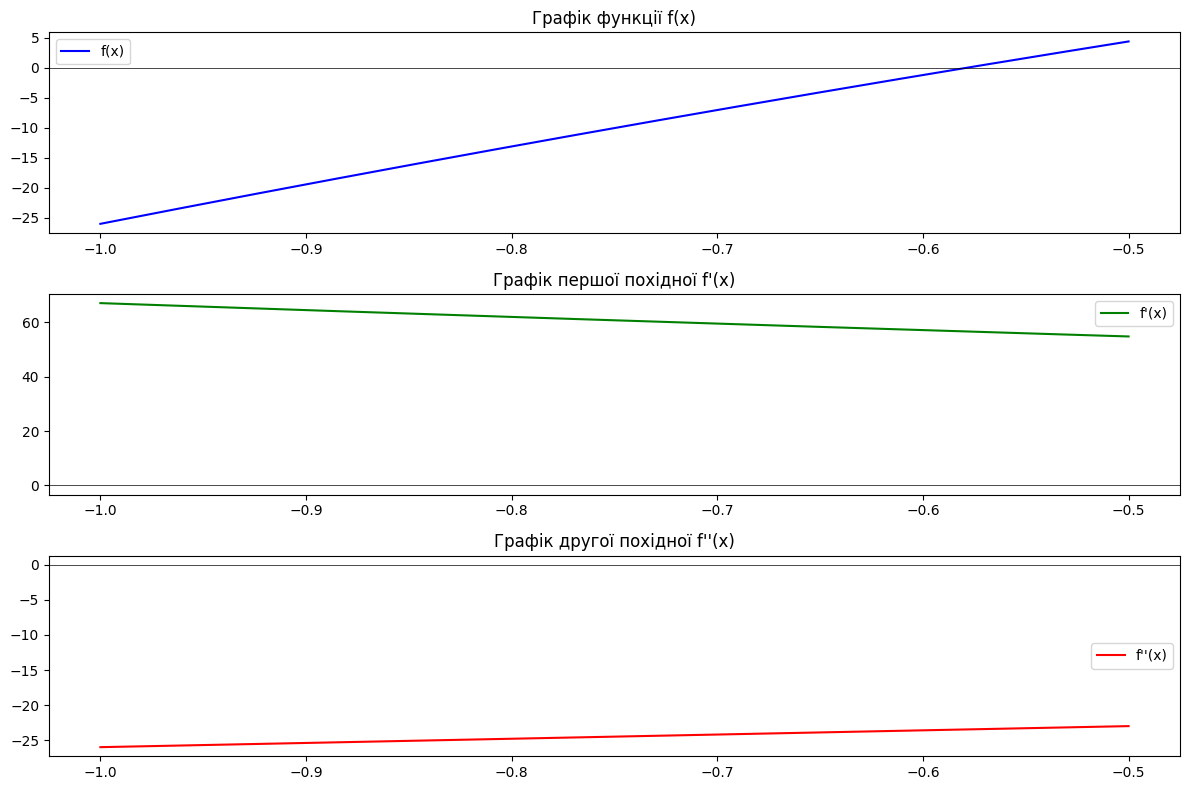

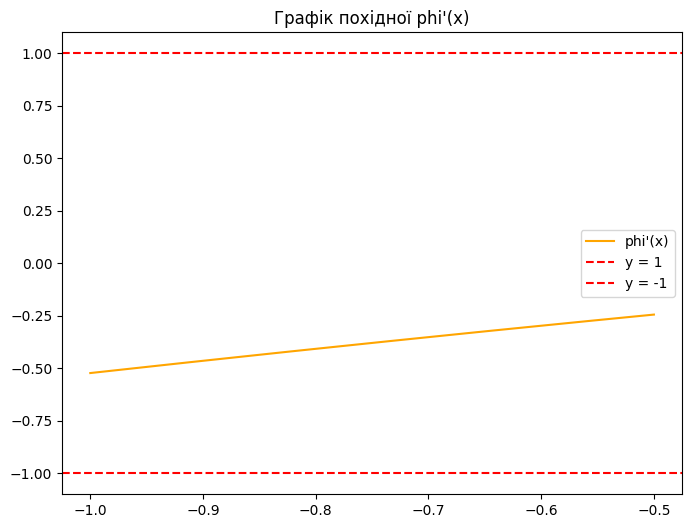

Мінімальне значення phi'(x) на інтервалі: 0.24431818181818182
Метод Ньютона
Очікувана кількість ітерацій: 3

Індекс     Значення x           Точність             f(x)                
0          -0.9000000000000000                       -19.4290000000000020
1          -0.5984479279838585  0.3015520720161415   -1.1274361509248223 
2          -0.5786833876640718  0.0197645403197867   -0.0045999775854959 
3          -0.5786020847916699  0.0000813028724019   -0.0000000775765905 

Можемо зупинитися після 3-ї ітерації, оскільки досягнута очікувана кількість ітерацій.

m1 (мін. абсолютна похідна): 54.75
M1 (макс. абсолютна похідна): 67
M2 (макс. абсолютна 2-га похідна): 26
q (фактор збіжності): 0.0950
Метод простої ітерації
Очікувана кількість ітерацій: 6

Індекс     Значення x           Точність             f(x)                
0          -0.6000000000000000                       -1.2159999999999975 
1          -0.5723636363636364  0.0276363636363636   0.3524922747287746  
2          -0.58037

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Параметри
EPSILON = 1e-4     # Точність
MAX_ITERATIONS = 1000  # Максимальна кількість ітерацій
INTERVAL = [-1.0, -0.5]  # Інтервал для розв'язання

# Функція та її похідні
def f(x):
    return x**3 - 10*x**2 + 44*x + 29

def f_prime(x):
    return 3*x**2 - 20*x + 44

def f_second_prime(x):
    return 6*x - 20

# Функція для методу простої ітерації
def phi(x):
    return (-x**3 + 10*x**2 - 29) / 44

def phi_prime(x):
    return (5*x)/11 - (3*x**2)/44

# Метод простої ітерації
def simple_iteration_method(x0, epsilon, max_iterations=MAX_ITERATIONS):
    x_current = x0
    for i in range(max_iterations):
        x_next = phi(x_current)
        if abs(x_next - x_current) < epsilon:
            return x_next, i + 1
        x_current = x_next
    return None, max_iterations

# Метод Ньютона
def newton_method(function, derivative_f, x0, EPSILON, max_iterations=MAX_ITERATIONS):
    x = x0
    x_vals = [x0]

    # Перевірка на відповідність умовам методу Ньютона
    if function(x0) * f_second_prime(x0) > 0:
        for i in range(max_iterations):
            if derivative_f(x) == 0:
                print("Похідна стала рівною нулю.")
                return x_vals

            x_new = x - function(x) / derivative_f(x)

            if abs(x_new - x) < EPSILON:
                x_vals.append(x_new)
                return x_vals

            x_vals.append(x_new)
            x = x_new

        print("Не вдалося досягти збіжності за максимальну кількість ітерацій.")
        return x_vals
    else:
        print("Невірна друга похідна для методу Ньютона.")
        return x_vals

# Виведення таблиці результатів для методу Ньютона
def print_table(x_vals, n_iterations, q, m1, M1, M2):
    print(f"Очікувана кількість ітерацій: {n_iterations}")
    print(f"\n{'Індекс':<10} {'Значення x':<20} {'Точність':<20} {'f(x)':<20}")
    print("=" * 80)

    for i in range(len(x_vals)):
        e = f"{abs(x_vals[i] - x_vals[i - 1]):<20.16f}" if i > 0 else " " * 20
        print(f"{i:<10} {x_vals[i]:<20.16f} {e:<20} {f(x_vals[i]):<20.16f}")

        # Перевірка кількості ітерацій
        if i >= n_iterations:
            print(f"\nМожемо зупинитися після {i}-ї ітерації, оскільки досягнута очікувана кількість ітерацій і точність.")
            break

    # Виведення результатів
    print(f"\nm1 (мін. абсолютна похідна): {m1}")
    print(f"M1 (макс. абсолютна похідна): {M1}")
    print(f"M2 (макс. абсолютна 2-га похідна): {M2}")
    print(f"q (фактор збіжності): {q:.4f}")


# Виведення таблиці результатів для методу простої ітерації
def print_table_simple_iteration(x_vals, n_iterations, q, delta):
    print(f"Очікувана кількість ітерацій: {n_iterations}")
    print(f"\n{'Індекс':<10} {'Значення x':<20} {'Точність':<20} {'f(x)':<20}")
    print("=" * 80)

    for i in range(len(x_vals)):
        e = f"{abs(x_vals[i] - x_vals[i - 1]):<20.16f}" if i > 0 else " " * 20
        print(f"{i:<10} {x_vals[i]:<20.16f} {e:<20} {f(x_vals[i]):<20.16f}")

        # Перевірка кількості ітерацій
        if i >= n_iterations:
            print(f"\nМожемо зупинитися після {i}-ї ітерації, оскільки досягнута очікувана кількість ітерацій і точність.")
            break

    # Виведення результатів
    print(f"\nq (фактор збіжності): {q:.4f}")
    print(f"delta (максимальна відстань між x0 та межами інтервалу): {delta:.4f}")



# Перевірка умов для методу Ньютона
def newton_check(x_min, x_max):
    if f(x_min) * f(x_max) < 0:
        sec_derivative_vals = np.array([f_second_prime(x) for x in np.linspace(x_min, x_max, 50)])
        if np.all(sec_derivative_vals >= 0) or np.all(sec_derivative_vals <= 0):
            return True
    return False

# Обчислення інтервалу та перевірка
def calculate_interval(interval, x0):
    x_min, x_max = interval
    if x0 < x_min or x0 > x_max:
        x0 = (x_min + x_max) / 2
        print(f"x0 поза діапазоном, змінено на {x0}")
    return x_min, x_max, x0

# Обчислення метрик для методу Ньютона
def calculate_metrics(x_min, x_max):
    x_values = np.linspace(x_min, x_max, 50)
    derivative_arr = np.abs([f_prime(x) for x in x_values])
    sec_derivative_arr = np.abs([f_second_prime(x) for x in x_values])

    m1 = np.min(derivative_arr)
    M1 = np.max(derivative_arr)
    M2 = np.max(sec_derivative_arr)

    return m1, M1, M2

# Обчислення кількості ітерацій
def calculate_iterations(delta, accuracy, q):
    primary_calc = math.log(abs(delta / accuracy)) / math.log(1 / q)
    return math.ceil(math.log2(primary_calc + 1))

# Виведення методу Ньютона
def newton_solve(interval, x0):
    print("Метод Ньютона")
    x_min, x_max, x0 = calculate_interval(interval, x0)
    # m1, M1, M2 = calculate_metrics(x_min, x_max)
    m1 = 54.75
    M1 = 67
    M2 = 26

    delta = max(abs(x_max - x0), abs(x_min - x0))

    if newton_check(x_min, x_max):
        q = (M2 * delta) / (2 * m1)
        if q < 1:
            n_iterations = calculate_iterations(delta, EPSILON, q)
            x_vals = newton_method(f, f_prime, x0, EPSILON)
            print_table(x_vals, n_iterations, q, m1, M1, M2)
        else:
            print("Збіжність не досягається, q > 1.")
    else:
        print("Перевірка умов Ньютона не пройдена.")

# Виведення методу простої ітерації
def simple_iteration_solve(interval, x0):
    print("Метод простої ітерації")
    x_min, x_max = interval
    x_values = np.linspace(x_min, x_max, 50)
    # q = min(np.abs([phi_prime(x) for x in x_values]))
    q = 0.2443
    x1 = phi(x0)  # Обчислення першого наближення
    initial_error = abs(x1 - x0)  # Початкова похибка

    delta = max(abs(x_max - x0), abs(x_min - x0))

    if abs(phi(x0) - x0) <= (1 - q) * delta:
        steps = math.ceil(math.log(initial_error / ((1 - q) * EPSILON)) / math.log(1 / q)) + 1
        root, steps_c = simple_iteration_method(x0, EPSILON)

        x_vals = [x0]
        for _ in range(steps_c):
            x_vals.append(phi(x_vals[-1]))
        print_table_simple_iteration(x_vals, steps, q, delta)
    else:
        print("Умова збіжності для простої ітерації не виконується.")

# Функція для побудови графіків
def plot_graphs():
    x_vals = np.linspace(INTERVAL[0], INTERVAL[1], 400)
    y_vals = f(x_vals)
    y_prime_vals = f_prime(x_vals)
    y_second_prime_vals = f_second_prime(x_vals)
    phi_vals = phi(x_vals)

    plt.figure(figsize=(12, 8))

    # Графік функції f(x)
    plt.subplot(3, 1, 1)
    plt.plot(x_vals, y_vals, label='f(x)', color='b')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.title("Графік функції f(x)")
    plt.legend()

    # Графік першої похідної f'(x)
    plt.subplot(3, 1, 2)
    plt.plot(x_vals, y_prime_vals, label="f'(x)", color='g')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.title("Графік першої похідної f'(x)")
    plt.legend()

    # Графік другої похідної f''(x)
    plt.subplot(3, 1, 3)
    plt.plot(x_vals, y_second_prime_vals, label="f''(x)", color='r')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.title("Графік другої похідної f''(x)")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Графік похідної функції phi(x)
    x_vals = np.linspace(INTERVAL[0], INTERVAL[1], 400)
    phi_prime_vals = phi_prime(x_vals)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, phi_prime_vals, label="phi'(x)", color='orange')
    plt.axhline(1, color='red', linestyle='--', label="y = 1")
    plt.axhline(-1, color='red', linestyle='--', label="y = -1")
    plt.title("Графік похідної phi'(x)")
    plt.legend()
    plt.show()

    # Виведення мінімального значення похідної phi'(x)
    print("Мінімальне значення phi'(x) на інтервалі:", np.min(np.abs(phi_prime_vals)))


# Виведення результатів
plot_graphs()
newton_solve(INTERVAL, -0.9)
simple_iteration_solve(INTERVAL, -0.6)

